In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 
# !pip install mpld3
# import mpld3
# mpld3.enable_notebook()

In [21]:
def dydt_function(theta_L, theta_H, beta_L, beta_H, mu, alpha, gamma, delta):
    def dydt(t, y):
        N = np.sum(y[1:]) 
        RR, SH, SL, E, I, R = y
        dRRdt = 0
        dSHdt_no_mu = -(theta_H * RR + beta_H * I) * SH / N 
        dSLdt_no_mu = -(theta_L * RR + beta_L * I) * SL / N
        dSHdt = dSHdt_no_mu - mu * SH
        dSLdt = dSLdt_no_mu - mu * SL
        dEdt = -(dSHdt_no_mu + dSLdt_no_mu + (alpha + mu) * E)
        dIdt = alpha * E - (mu + delta + gamma) * I
        dRdt = gamma * I - mu * R
        return np.array([dRRdt, dSHdt, dSLdt, dEdt, dIdt, dRdt])
    return dydt
        
        

In [38]:
def rodent_solution(
    theta_L=0.25,
    theta_H=0.75,
    beta_L=0.5,
    beta_H=0.5,
    mu=0.025,
    alpha=0.1,
    gamma=0.1,
    delta=0.35,
    RR0=1000,
    SH0=100,  # Initially 999 susceptibel
    SL0=900,  # Initially 999 susceptibel
    E0=0,
    I0=0,  # Initially  1 infected
    R0=0,  # Initially 0 removed
    end_day=50,
    num_gridpoints=51
):
    y0 = [RR0, SH0, SL0, E0, I0, R0] 
    N = SH0 + SL0 + E0 + I0 + R0 
    f = dydt_function(theta_L, theta_H, beta_L, beta_H, mu, alpha, gamma, delta)

    return solve_ivp(
        fun=f, 
        t_span=[0, end_day], 
        y0=y0,
        t_eval=np.linspace(0, end_day, num_gridpoints))
    

In [40]:
ret = rodent_solution()

In [41]:
def plotsir(ret):
    t = ret.t
    RR, SH, SL, E, I, R = ret.y
    S = SH + SL
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)


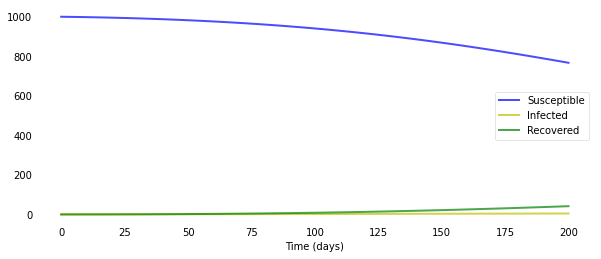

In [43]:
plotsir(rodent_solution(RR0=1, theta_L=0.001, mu=0.0001, end_day=200, num_gridpoints=100))

In [29]:
ret.y.shape

(6, 51)